# Initiation

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from PIL import Image # to import an image: pillow as PIL
import requests
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [2]:
df = pd.read_csv(r'UNGA_speeches.csv', nrows = 3000, encoding = 'cp1252') #This line is to read a csv file with the parameter of (r'which file to be read', nrows= how many rows would you want the file to be displayed)
df

,COUNTRY,STATEMENT
0,United Kingdom,"Mr President, your excellencies, ladies and ge..."
1,EU,In Senegal last December I met passionate doct...
2,South Korea,"Mr. President,\nMr. Secretary General,\nDistin..."
3,Ukraine,Greetings to all people of the world who value...
4,France,"President of the General Assembly,\nUnder-Secr..."
5,Indonesia,"Mr. President, \n\nMany Leaders have spoken he..."
6,US,"Mr. President, Mr. Secretary-General, my fello..."


In [3]:
df = df.rename(columns=str.lower)
df

,country,statement
0,United Kingdom,"Mr President, your excellencies, ladies and ge..."
1,EU,In Senegal last December I met passionate doct...
2,South Korea,"Mr. President,\nMr. Secretary General,\nDistin..."
3,Ukraine,Greetings to all people of the world who value...
4,France,"President of the General Assembly,\nUnder-Secr..."
5,Indonesia,"Mr. President, \n\nMany Leaders have spoken he..."
6,US,"Mr. President, Mr. Secretary-General, my fello..."


In [4]:
speeches = pd.DataFrame(df)
speeches

,country,statement
0,United Kingdom,"Mr President, your excellencies, ladies and ge..."
1,EU,In Senegal last December I met passionate doct...
2,South Korea,"Mr. President,\nMr. Secretary General,\nDistin..."
3,Ukraine,Greetings to all people of the world who value...
4,France,"President of the General Assembly,\nUnder-Secr..."
5,Indonesia,"Mr. President, \n\nMany Leaders have spoken he..."
6,US,"Mr. President, Mr. Secretary-General, my fello..."


## Getting the most common nouns of all statements

In [5]:
statements = []
for statement in df.statement:
    statements.append(statement)

text = " ".join(statements)

text

#Basically the lines above is to iterate through every data inside df_2000 but only will iterate the text by using the 'review' function. 
#Every data inside df_2000 will be assigned into an array called 'reviews' and for every word it will be joined using " "

'Mr President, your excellencies, ladies and gentlemen,\n\nAt the time of its foundation, the United Nations was a beacon of promise.\n\nIn the aftermath of the Second World War, this building symbolised the end of aggression.\n\nFor many decades the UN has helped to deliver stability and security in much of the world.\n\nIt has provided a place for nations to work together on shared challenges.\n\nAnd it has promoted the principles of sovereignty and self-determination even through the Cold War and its aftermath.\n\nBut today those principles, that have defined our lives since the dark days of the 1940s, are fracturing.\n\nFor the first time in the history of this assembly we are meeting during a large-scale war of aggression in Europe.\n\nAnd authoritarian states are undermining stability and security around the world.\n\nGeopolitics is entering a new era ? one that requires those who believe in the founding principles of the United Nations to stand up and be counted.\n\nIn the Unite

In [6]:
tokens = nltk.word_tokenize(text) #After joined the whole word into a pack of words, we can just tokenize them word by word

In [7]:
tokens[:10]

['Mr',
 'President',
 ',',
 'your',
 'excellencies',
 ',',
 'ladies',
 'and',
 'gentlemen',
 ',']

In [61]:
words = []
for word in tokens:
    if word.isalnum():
        words.append(word)

new_tokens = words
new_tokens

#And for every word in tokens, if it is alphabet or number, it will be appended inside a new array called 'words' and it will look like the output below

['Mr',
 'President',
 'your',
 'excellencies',
 'ladies',
 'and',
 'gentlemen',
 'At',
 'the',
 'time',
 'of',
 'its',
 'foundation',
 'the',
 'United',
 'Nations',
 'was',
 'a',
 'beacon',
 'of',
 'promise',
 'In',
 'the',
 'aftermath',
 'of',
 'the',
 'Second',
 'World',
 'War',
 'this',
 'building',
 'symbolised',
 'the',
 'end',
 'of',
 'aggression',
 'For',
 'many',
 'decades',
 'the',
 'UN',
 'has',
 'helped',
 'to',
 'deliver',
 'stability',
 'and',
 'security',
 'in',
 'much',
 'of',
 'the',
 'world',
 'It',
 'has',
 'provided',
 'a',
 'place',
 'for',
 'nations',
 'to',
 'work',
 'together',
 'on',
 'shared',
 'challenges',
 'And',
 'it',
 'has',
 'promoted',
 'the',
 'principles',
 'of',
 'sovereignty',
 'and',
 'even',
 'through',
 'the',
 'Cold',
 'War',
 'and',
 'its',
 'aftermath',
 'But',
 'today',
 'those',
 'principles',
 'that',
 'have',
 'defined',
 'our',
 'lives',
 'since',
 'the',
 'dark',
 'days',
 'of',
 'the',
 '1940s',
 'are',
 'fracturing',
 'For',
 'the',
 '

In [9]:
len(new_tokens)

16776

In [10]:
pos_tokens = nltk.pos_tag(new_tokens)
pos_tokens

[('Mr', 'NNP'),
 ('President', 'NNP'),
 ('your', 'PRP$'),
 ('excellencies', 'NNS'),
 ('ladies', 'NNS'),
 ('and', 'CC'),
 ('gentlemen', 'NNS'),
 ('At', 'IN'),
 ('the', 'DT'),
 ('time', 'NN'),
 ('of', 'IN'),
 ('its', 'PRP$'),
 ('foundation', 'NN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('Nations', 'NNP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('beacon', 'NN'),
 ('of', 'IN'),
 ('promise', 'NN'),
 ('In', 'IN'),
 ('the', 'DT'),
 ('aftermath', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Second', 'NNP'),
 ('World', 'NNP'),
 ('War', 'NNP'),
 ('this', 'DT'),
 ('building', 'NN'),
 ('symbolised', 'VBD'),
 ('the', 'DT'),
 ('end', 'NN'),
 ('of', 'IN'),
 ('aggression', 'NN'),
 ('For', 'IN'),
 ('many', 'JJ'),
 ('decades', 'NNS'),
 ('the', 'DT'),
 ('UN', 'NNP'),
 ('has', 'VBZ'),
 ('helped', 'VBN'),
 ('to', 'TO'),
 ('deliver', 'VB'),
 ('stability', 'NN'),
 ('and', 'CC'),
 ('security', 'NN'),
 ('in', 'IN'),
 ('much', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('It', 'PRP'),
 ('has', 'VBZ'),
 ('provi

In [11]:
nouns = []
for word, pos in pos_tokens:
    if pos.startswith('N'):
        nouns.append(word)
        
nouns[:30]


['Mr',
 'President',
 'excellencies',
 'ladies',
 'gentlemen',
 'time',
 'foundation',
 'United',
 'Nations',
 'beacon',
 'promise',
 'aftermath',
 'Second',
 'World',
 'War',
 'building',
 'end',
 'aggression',
 'decades',
 'UN',
 'stability',
 'security',
 'world',
 'place',
 'nations',
 'challenges',
 'principles',
 'sovereignty',
 'Cold',
 'War']

In [12]:
len(nouns)

4738

In [13]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
preprocessed_statement = [word for word in nouns if word not in stop_words]
preprocessed_statement

['Mr',
 'President',
 'excellencies',
 'ladies',
 'gentlemen',
 'time',
 'foundation',
 'United',
 'Nations',
 'beacon',
 'promise',
 'aftermath',
 'Second',
 'World',
 'War',
 'building',
 'end',
 'aggression',
 'decades',
 'UN',
 'stability',
 'security',
 'world',
 'place',
 'nations',
 'challenges',
 'principles',
 'sovereignty',
 'Cold',
 'War',
 'aftermath',
 'today',
 'principles',
 'lives',
 'days',
 '1940s',
 'time',
 'history',
 'assembly',
 'war',
 'aggression',
 'Europe',
 'states',
 'stability',
 'security',
 'world',
 'Geopolitics',
 'era',
 'one',
 'principles',
 'United',
 'Nations',
 'United',
 'Kingdom',
 'era',
 'days',
 'Majesty',
 'Queen',
 'Elizabeth',
 'II',
 'passing',
 'service',
 'rock',
 'Britain',
 'values',
 'organisation',
 'monarchy',
 'society',
 'stability',
 'Majesty',
 'difference',
 'division',
 'visits',
 'South',
 'Africa',
 'Republic',
 'Ireland',
 'General',
 'Assembly',
 'years',
 'ideals',
 'ideals',
 'people',
 'Late',
 'Queen',
 'UK',
 'chapt

In [62]:
len(preprocessed_statement)

4734

In [15]:
lemmatized = []
for i in preprocessed_statement:
    lemmatized.append(wnl.lemmatize(i))

In [16]:
freq = nltk.FreqDist(lemmatized) #FreqDist function is used to calculate the number of frequency a word occured in the output.
freq.most_common(30) #The "most_common" sub-function is used to display the most common word occured in the output, in this case we want to show only the 30 most common words.

[('world', 96),
 ('war', 79),
 ('country', 73),
 ('peace', 73),
 ('United', 61),
 ('Russia', 58),
 ('security', 53),
 ('people', 48),
 ('Ukraine', 45),
 ('nation', 44),
 ('right', 35),
 ('States', 35),
 ('today', 32),
 ('state', 32),
 ('freedom', 32),
 ('Nations', 30),
 ('aggression', 28),
 ('food', 28),
 ('time', 27),
 ('year', 27),
 ('crisis', 26),
 ('life', 25),
 ('value', 25),
 ('climate', 25),
 ('energy', 24),
 ('Charter', 24),
 ('principle', 23),
 ('UN', 22),
 ('support', 21),
 ('Union', 21)]

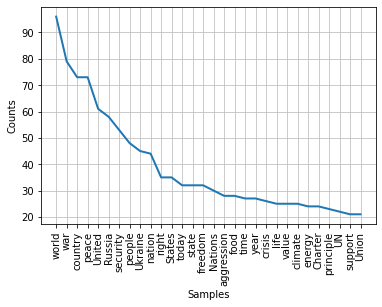

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
freq.plot(30) #Now we can just plot things up

# This is the four countries

## Here i will only get words that already been lemmatized

In [18]:
UK = nltk.word_tokenize(statements[0])
EU = nltk.word_tokenize(statements[1])
SK = nltk.word_tokenize(statements[2])
Ukraine = nltk.word_tokenize(statements[3])
France = nltk.word_tokenize(statements[4])
Indonesia = nltk.word_tokenize(statements[5])
US = nltk.word_tokenize(statements[6])

In [19]:
Indonesia_tokens=[]
for word in Indonesia:
    if word.isalnum():
        Indonesia_tokens.append(word)
        
UK_tokens=[]
for word in UK:
    if word.isalnum():
        UK_tokens.append(word)
        
        
SK_tokens=[]
for word in SK:
    if word.isalnum():
        SK_tokens.append(word)

US_tokens=[]
for word in US:
    if word.isalnum():
        US_tokens.append(word)

In [20]:
Indon_sw = [word for word in Indonesia_tokens if word not in stop_words]
UK_sw = [word for word in UK_tokens if word not in stop_words]
SK_sw = [word for word in SK_tokens if word not in stop_words]
US_sw = [word for word in US_tokens if word not in stop_words]

In [21]:
Indon_lem=[]
for i in Indon_sw:
    Indon_lem.append(wnl.lemmatize(i))

Indon_joined = " ".join(Indon_lem)
        
UK_lem=[]
for i in UK_sw:
    UK_lem.append(wnl.lemmatize(i))
    
UK_joined = " ".join(UK_lem)
    
SK_lem=[]
for i in SK_sw:
    SK_lem.append(wnl.lemmatize(i))
    
SK_joined = " ".join(SK_lem)
    
US_lem=[]
for i in US_sw:
    US_lem.append(wnl.lemmatize(i))
    
US_joined = " ".join(US_lem)

In [22]:
freq_Indon = nltk.FreqDist(Indon_lem)
freq_Indon.most_common(100)

[('We', 14),
 ('paradigm', 14),
 ('must', 11),
 ('new', 10),
 ('The', 9),
 ('would', 9),
 ('world', 7),
 ('need', 7),
 ('peace', 7),
 ('President', 6),
 ('global', 6),
 ('This', 6),
 ('Indonesia', 6),
 ('country', 6),
 ('ASEAN', 6),
 ('I', 5),
 ('A', 5),
 ('also', 5),
 ('recovery', 5),
 ('become', 4),
 ('u', 4),
 ('continue', 4),
 ('path', 4),
 ('It', 4),
 ('people', 4),
 ('regional', 4),
 ('Myanmar', 4),
 ('Pacific', 4),
 ('multilateralism', 4),
 ('War', 3),
 ('international', 3),
 ('crisis', 3),
 ('climate', 3),
 ('change', 3),
 ('phenomenon', 3),
 ('These', 3),
 ('today', 3),
 ('instead', 3),
 ('going', 3),
 ('stand', 3),
 ('collaboration', 3),
 ('many', 3),
 ('part', 3),
 ('trust', 3),
 ('principle', 3),
 ('peaceful', 3),
 ('responsibility', 3),
 ('fit', 3),
 ('Palestine', 3),
 ('strong', 3),
 ('G20', 3),
 ('developing', 3),
 ('address', 3),
 ('That', 3),
 ('time', 3),
 ('Many', 2),
 ('day', 2),
 ('share', 2),
 ('pandemic', 2),
 ('persists', 2),
 ('nation', 2),
 ('longer', 2),
 ('l

In [23]:
freq_UK = nltk.FreqDist(UK_lem)
freq_UK.most_common(100)

[('We', 20),
 ('new', 16),
 ('And', 14),
 ('deliver', 11),
 ('must', 11),
 ('security', 10),
 ('world', 9),
 ('era', 9),
 ('people', 9),
 ('freedom', 9),
 ('The', 9),
 ('democracy', 8),
 ('economy', 7),
 ('aggression', 6),
 ('one', 6),
 ('I', 6),
 ('act', 6),
 ('Ukraine', 6),
 ('time', 5),
 ('United', 5),
 ('In', 5),
 ('building', 5),
 ('authoritarian', 5),
 ('around', 5),
 ('Late', 5),
 ('UK', 5),
 ('want', 5),
 ('This', 5),
 ('citizen', 5),
 ('regime', 5),
 ('many', 4),
 ('stability', 4),
 ('together', 4),
 ('But', 4),
 ('today', 4),
 ('life', 4),
 ('history', 4),
 ('state', 4),
 ('Majesty', 4),
 ('Queen', 4),
 ('value', 4),
 ('Our', 4),
 ('society', 4),
 ('progress', 4),
 ('strong', 4),
 ('partnership', 4),
 ('instrument', 4),
 ('need', 4),
 ('growth', 4),
 ('reliable', 4),
 ('UN', 3),
 ('It', 3),
 ('work', 3),
 ('principle', 3),
 ('Europe', 3),
 ('Kingdom', 3),
 ('Her', 3),
 ('Britain', 3),
 ('democratic', 3),
 ('also', 3),
 ('defend', 3),
 ('hope', 3),
 ('commitment', 3),
 ('colle

In [24]:
freq_US = nltk.FreqDist(US_lem)
freq_US.most_common(100)

[('United', 36),
 ('world', 35),
 ('States', 31),
 ('And', 25),
 ('We', 25),
 ('nation', 22),
 ('country', 20),
 ('I', 15),
 ('right', 15),
 ('every', 14),
 ('year', 13),
 ('Russia', 13),
 ('The', 13),
 ('global', 13),
 ('food', 12),
 ('war', 12),
 ('climate', 12),
 ('Charter', 11),
 ('today', 11),
 ('around', 11),
 ('Ukraine', 10),
 ('people', 10),
 ('billion', 10),
 ('partner', 10),
 ('working', 10),
 ('stand', 10),
 ('one', 9),
 ('state', 9),
 ('security', 9),
 ('also', 9),
 ('need', 9),
 ('crisis', 8),
 ('nuclear', 8),
 ('support', 8),
 ('work', 8),
 ('peace', 8),
 ('member', 7),
 ('This', 7),
 ('history', 7),
 ('believe', 7),
 ('help', 7),
 ('meet', 7),
 ('new', 7),
 ('insecurity', 6),
 ('u', 6),
 ('Council', 6),
 ('But', 6),
 ('without', 6),
 ('way', 6),
 ('So', 6),
 ('democracy', 6),
 ('challenge', 6),
 ('still', 6),
 ('diplomacy', 6),
 ('change', 6),
 ('investment', 6),
 ('leader', 5),
 ('Let', 5),
 ('permanent', 5),
 ('Nations', 5),
 ('clear', 5),
 ('In', 5),
 ('economic', 5),

In [25]:
freq_SK = nltk.FreqDist(UK_lem)
freq_SK.most_common(100)

[('We', 20),
 ('new', 16),
 ('And', 14),
 ('deliver', 11),
 ('must', 11),
 ('security', 10),
 ('world', 9),
 ('era', 9),
 ('people', 9),
 ('freedom', 9),
 ('The', 9),
 ('democracy', 8),
 ('economy', 7),
 ('aggression', 6),
 ('one', 6),
 ('I', 6),
 ('act', 6),
 ('Ukraine', 6),
 ('time', 5),
 ('United', 5),
 ('In', 5),
 ('building', 5),
 ('authoritarian', 5),
 ('around', 5),
 ('Late', 5),
 ('UK', 5),
 ('want', 5),
 ('This', 5),
 ('citizen', 5),
 ('regime', 5),
 ('many', 4),
 ('stability', 4),
 ('together', 4),
 ('But', 4),
 ('today', 4),
 ('life', 4),
 ('history', 4),
 ('state', 4),
 ('Majesty', 4),
 ('Queen', 4),
 ('value', 4),
 ('Our', 4),
 ('society', 4),
 ('progress', 4),
 ('strong', 4),
 ('partnership', 4),
 ('instrument', 4),
 ('need', 4),
 ('growth', 4),
 ('reliable', 4),
 ('UN', 3),
 ('It', 3),
 ('work', 3),
 ('principle', 3),
 ('Europe', 3),
 ('Kingdom', 3),
 ('Her', 3),
 ('Britain', 3),
 ('democratic', 3),
 ('also', 3),
 ('defend', 3),
 ('hope', 3),
 ('commitment', 3),
 ('colle

In [26]:
wc_indon = WordCloud(max_font_size=50, max_words=100, height=400, width=600, background_color='white')

wc_UK = WordCloud(max_font_size=50, max_words=100, height=400, width=600, background_color='black')

wc_US= WordCloud(max_font_size=50, max_words=100, height=400, width=600, background_color='white')

wc_SK = WordCloud(max_font_size=50, max_words=100, height=400, width=600, background_color='black')

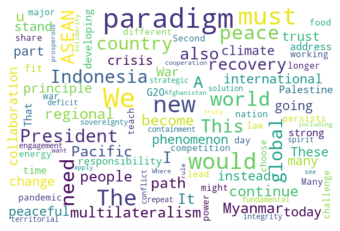

In [27]:
plt.imshow(wc_indon.generate_from_frequencies(freq_Indon), interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
wc_indon.to_file('Indonesia.png')

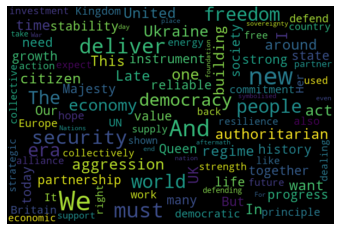

In [29]:
plt.imshow(wc_UK.generate_from_frequencies(freq_UK), interpolation='bilinear') #Then we can show the image using the same attributes that was made on the top cell. The text will be generated from the adjectives.
plt.axis('off')
plt.show()

In [30]:
wc_UK.to_file('UK.png')

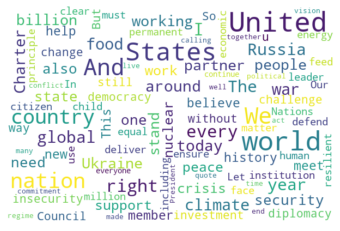

In [31]:
plt.imshow(wc_US.generate_from_frequencies(freq_US), interpolation='bilinear') #Then we can show the image using the same attributes that was made on the top cell. The text will be generated from the adjectives.
plt.axis('off')
plt.show()

In [32]:
wc_US.to_file('US.png')

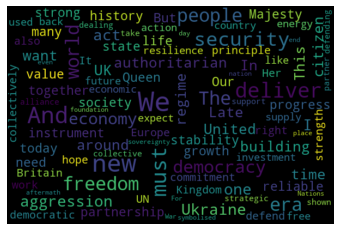

In [33]:
plt.imshow(wc_SK.generate_from_frequencies(freq_SK), interpolation='bilinear') #Then we can show the image using the same attributes that was made on the top cell. The text will be generated from the adjectives.
plt.axis('off')
plt.show()

In [34]:
wc_SK.to_file('SK.png')

### Now we can mask the image as the shape of their country

In [35]:
UK_pic = np.array(Image.open('UK_png.png'))

In [36]:
image_color= ImageColorGenerator(UK_pic)

In [37]:
wc_UK_mask = WordCloud(width=500, height=800, min_font_size=10,max_font_size=50,background_color='white', colormap='plasma', mask=UK_pic, color_func=image_color)

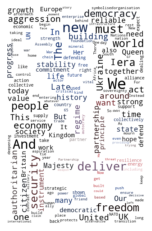

In [38]:
plt.imshow(wc_UK_mask.generate_from_frequencies(freq_UK), interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
Indon_pic = np.array(Image.open('Indonesia_png.png'))

In [40]:
image_color= ImageColorGenerator(Indon_pic)

In [41]:
wc_indon_mask = WordCloud(width=1500, height=590, min_font_size=10,max_font_size=50,background_color='white', colormap='plasma', mask=Indon_pic, color_func=image_color)

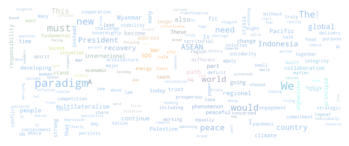

In [42]:
plt.imshow(wc_indon_mask.generate_from_frequencies(freq_Indon), interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
US_pic = np.array(Image.open('US_png.png'))

In [44]:
image_color= ImageColorGenerator(US_pic)

In [45]:
wc_US_mask = WordCloud(width=1500, height=590, min_font_size=10,max_font_size=50,background_color='white', colormap='plasma', mask=US_pic, color_func=image_color)

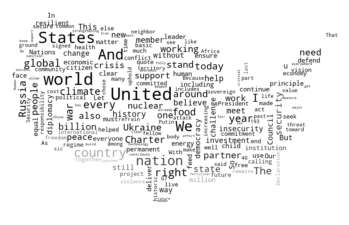

In [46]:
plt.imshow(wc_US_mask.generate_from_frequencies(freq_US), interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
SK_pic = np.array(Image.open('SK_png.png'))

In [48]:
image_color= ImageColorGenerator(SK_pic)

In [49]:
wc_SK_mask = WordCloud(width=2000, height=700, min_font_size=10,max_font_size=30,background_color='white', colormap='plasma', mask=SK_pic, color_func=image_color)

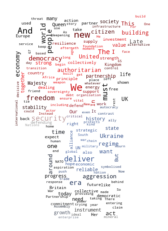

In [50]:
plt.imshow(wc_SK_mask.generate_from_frequencies(freq_SK), interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
wc_indon_mask.to_file('Indonesia.png')

In [52]:
wc_UK_mask.to_file('UK.png')

In [53]:
wc_US_mask.to_file('US.png')

In [54]:
wc_SK_mask.to_file('SK.png')

## Putting subjectivity and polarity into the table

In [55]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [56]:
from textblob import TextBlob, Word, Blobber

In [57]:
speeches['polarity']=speeches['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [58]:
speeches

,country,statement,polarity
0,United Kingdom,"Mr President, your excellencies, ladies and ge...",0.118472
1,EU,In Senegal last December I met passionate doct...,0.042572
2,South Korea,"Mr. President,\nMr. Secretary General,\nDistin...",0.122525
3,Ukraine,Greetings to all people of the world who value...,0.052193
4,France,"President of the General Assembly,\nUnder-Secr...",0.073262
5,Indonesia,"Mr. President, \n\nMany Leaders have spoken he...",0.098319
6,US,"Mr. President, Mr. Secretary-General, my fello...",0.133014


In [59]:
speeches['subjectivity']=speeches['statement'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [60]:
speeches

,country,statement,polarity,subjectivity
0,United Kingdom,"Mr President, your excellencies, ladies and ge...",0.118472,0.460900
1,EU,In Senegal last December I met passionate doct...,0.042572,0.369043
2,South Korea,"Mr. President,\nMr. Secretary General,\nDistin...",0.122525,0.296547
3,Ukraine,Greetings to all people of the world who value...,0.052193,0.422081
4,France,"President of the General Assembly,\nUnder-Secr...",0.073262,0.404080
5,Indonesia,"Mr. President, \n\nMany Leaders have spoken he...",0.098319,0.389460
6,US,"Mr. President, Mr. Secretary-General, my fello...",0.133014,0.452757


#### I know the whole code is pretty messed up, but ive tried my best :)) Thank you for your understanding, oh yeah and one more thing, some countries cant be masked and i dont know why